In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

PIB PER CAPITA

In [54]:
df_pib = pd.read_excel('wb_pib_per_capita_paises.xls')

In [55]:
df_pib = df_pib.rename(columns={
    'Country Name': 'País'
})

In [56]:
anos = [str(i) for i in itertools.chain(range(2003, 2006), range(2008, 2025, 2))]
df_pib = df_pib.melt(
    id_vars='País',
    value_vars=anos,
    var_name='Ano',
    value_name='Produto Interno Bruto',
)

In [57]:
df_pib['Ano'] = df_pib['Ano'].astype(int)

In [58]:
df_pib = df_pib[df_pib['País'] == "Brazil"].reset_index(drop=True)

ÍNDICE DE DEMOCRACIA ELEITORAL

In [59]:
egdi_2003 = pd.read_csv('EGOV_DATA_2003.csv')
egdi_2004 = pd.read_csv('EGOV_DATA_2004.csv')
egdi_2005 = pd.read_csv('EGOV_DATA_2005.csv')
egdi_2008 = pd.read_csv('EGOV_DATA_2008.csv')
egdi_2010 = pd.read_csv('EGOV_DATA_2010.csv')
egdi_2012 = pd.read_csv('EGOV_DATA_2012.csv')
egdi_2014 = pd.read_csv('EGOV_DATA_2014.csv')
egdi_2016 = pd.read_csv('EGOV_DATA_2016.csv')
egdi_2018 = pd.read_csv('EGOV_DATA_2018.csv')
egdi_2020 = pd.read_csv('EGOV_DATA_2020.csv')
egdi_2022 = pd.read_csv('EGOV_DATA_2022.csv')
egdi_2024 = pd.read_csv('EGOV_DATA_2024.csv')

In [60]:
egdi = pd.concat([
    egdi_2003,
    egdi_2004,
    egdi_2005,
    egdi_2008,
    egdi_2010,
    egdi_2012,
    egdi_2014,
    egdi_2016,
    egdi_2018,
    egdi_2020,
    egdi_2022,
    egdi_2024
]).reset_index(drop=True)

In [61]:
anos = itertools.chain(range(2003, 2006), range(2008, 2025, 2))
egdi = egdi[egdi['Survey Year'].isin(anos)].reset_index(drop=True)
egdi = egdi[egdi['Country Name'] == "Brazil"].reset_index(drop=True)

MERGE

In [62]:
egdi['Produto Interno Bruto'] = df_pib['Produto Interno Bruto']

In [63]:
egdi = egdi.iloc[:, range(3,9)]

CORRELAÇÃO

In [64]:
corr = egdi.corr(method='pearson')

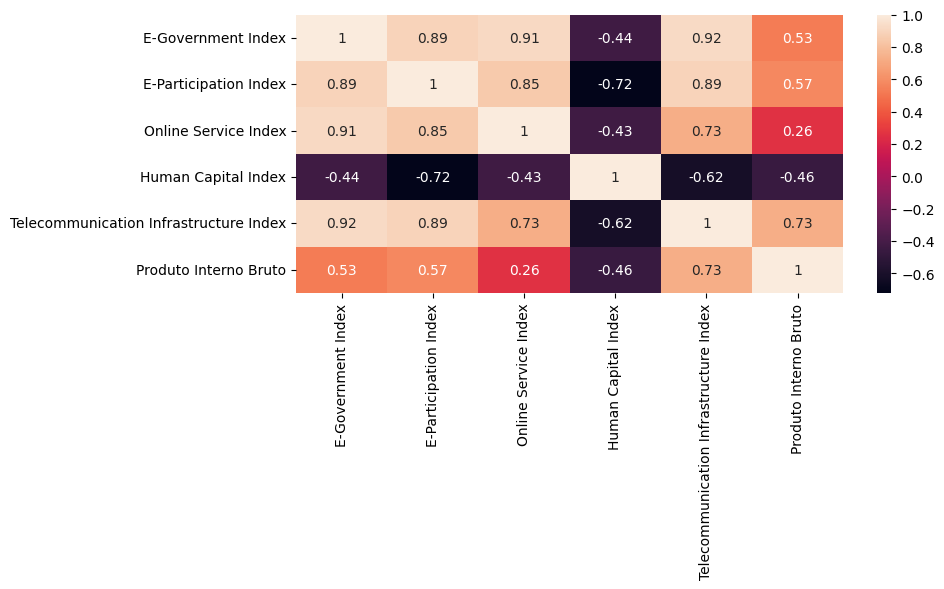

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr, annot=True)

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/correlacao6.png')
plt.tight_layout()
plt.show()